In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
from matplotlib.colors import ListedColormap

In [2]:
sample_df = pd.read_csv('sample_submission.csv', encoding='latin-1')
test_df = pd.read_csv('test.csv', encoding='latin-1')
train_df = pd.read_csv('train.csv', encoding='latin-1')


In [3]:
sample_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#sample_df.info()
#test_df.info()
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [8]:
# agrego una columna que cuenta la cantidad de caracteres que tiene cada tweet
train_df['text_count'] = train_df['text'].transform(func = lambda x : x.str.len())



In [9]:
train_df.head()

,id,keyword,location,text,target,text_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [10]:
train_df.describe()

,id,target,text_count
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.336136
std,3137.116090,0.49506,33.991338
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,134.000000
max,10873.000000,1.00000,163.000000


### Analisis de correlacion

In [11]:
# Opcion para hacer la logica del proximo bloque de codigo pero con lambdas

#train_df_v_lucas = train_df
#train_df_v_lucas['new_target'] = train_df['target'].transform(func = lambda x : 1 if x == 1 else -1)
#train_df_v_lucas.head(20)


In [12]:
train_df['new_target'] = np.where(train_df['target']==1, 1, -1)

In [13]:
train_agrupado = train_df.groupby(['text_count']).agg({'new_target':['sum']}) 


In [14]:
train_agrupado

,new_target
,sum
text_count,
7,-3
8,-4
9,-2
10,-2
11,-4
...,...
155,0
157,-2


In [15]:
level0=train_agrupado.columns.get_level_values(0)

level1=train_agrupado.columns.get_level_values(1)

train_agrupado.columns = level0 + '_' + level1

In [16]:
train_agrupado=train_agrupado.reset_index()

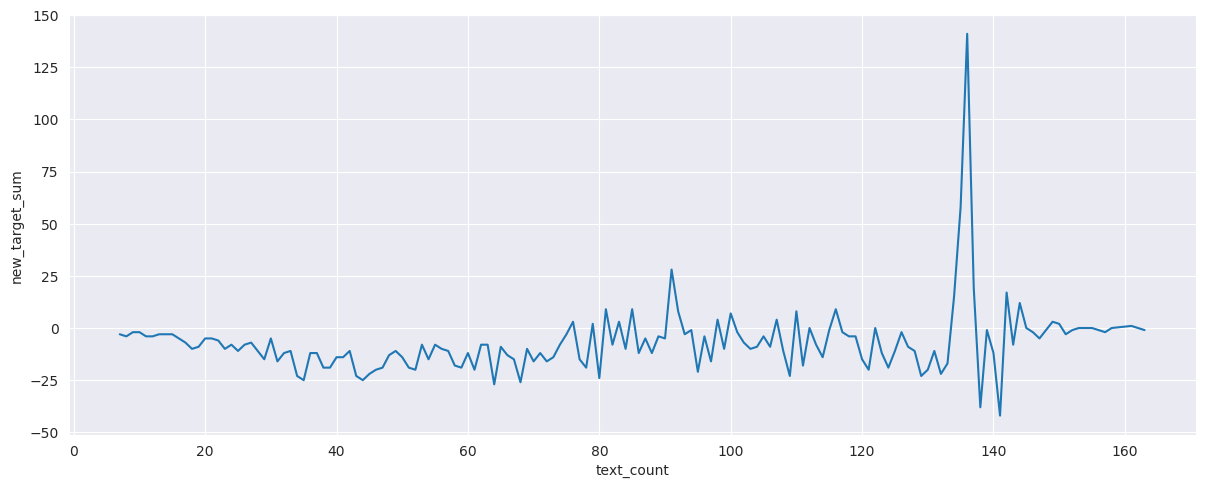

In [17]:
ax= plt.figure(figsize=(32, 12))

gs = ax.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = ax.add_subplot(gs[0, 0])
    sns.lineplot(x='text_count', y='new_target_sum', data=train_agrupado)
    


### data frame de falsos

In [18]:
falsos_df = train_df[(train_df['target']==0)]
falsos_df

,id,keyword,location,text,target,text_count,new_target
15,23,NaN,NaN,What's up man?,0,14,-1
16,24,NaN,NaN,I love fruits,0,13,-1
17,25,NaN,NaN,Summer is lovely,0,16,-1
18,26,NaN,NaN,My car is so fast,0,17,-1
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28,-1
...,...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,104,-1
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,80,-1
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,129,-1
7587,10841,NaN,NaN,Sirens everywhere!,0,18,-1


In [19]:
falsos_df = falsos_df.groupby(['text_count']).agg({'target':['mean', 'max', 'min','count']}) 

falsos_df

target              
             mean max min count
text_count                     
7               0   0   0     3
8               0   0   0     4
9               0   0   0     2
10              0   0   0     2
11              0   0   0     4
...           ...  ..  ..   ...
154             0   0   0     1
155             0   0   0     1
157             0   0   0     2
158             0   0   0     1
163             0   0   0     1

[151 rows x 4 columns]

In [20]:
level0=falsos_df.columns.get_level_values(0)

level1=falsos_df.columns.get_level_values(1)

falsos_df.columns = level0 + '_' + level1

In [21]:
falsos_df

,target_mean,target_max,target_min,target_count
text_count,,,,
7,0,0,0,3
8,0,0,0,4
9,0,0,0,2
10,0,0,0,2
11,0,0,0,4
...,...,...,...,...
154,0,0,0,1
155,0,0,0,1
157,0,0,0,2


In [22]:
falsos_df=falsos_df.reset_index()

In [23]:
falsos_df

,text_count,target_mean,target_max,target_min,target_count
0,7,0,0,0,3
1,8,0,0,0,4
2,9,0,0,0,2
3,10,0,0,0,2
4,11,0,0,0,4
...,...,...,...,...,...
146,154,0,0,0,1
147,155,0,0,0,1
148,157,0,0,0,2
149,158,0,0,0,1


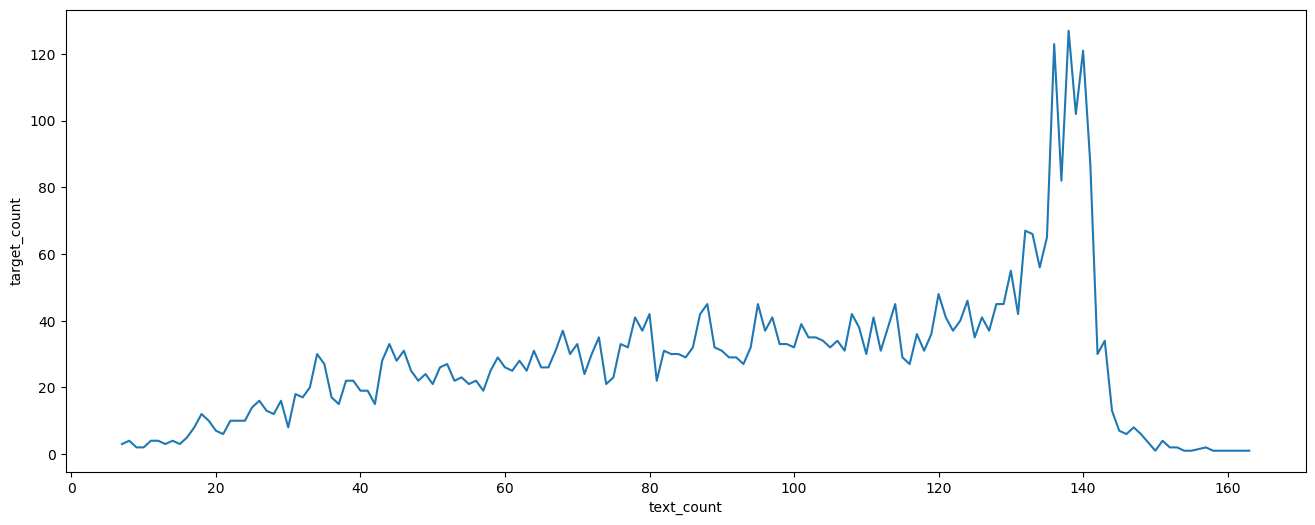

In [24]:
ax= plt.figure(figsize=(16, 6))
sns.lineplot(x='text_count', y='target_count', data=falsos_df)

### data frame de verdaderos

In [25]:
verdaderos_df = train_df[(train_df['target']==1)]
verdaderos_df

,id,keyword,location,text,target,text_count,new_target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,1
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,1


In [26]:
verdaderos_df = verdaderos_df.groupby(['text_count']).agg({'target':['mean', 'max', 'min','count']}) 

verdaderos_df


target              
             mean max min count
text_count                     
14              1   1   1     1
17              1   1   1     1
18              1   1   1     2
19              1   1   1     1
20              1   1   1     2
...           ...  ..  ..   ...
153             1   1   1     2
154             1   1   1     1
155             1   1   1     1
158             1   1   1     1
161             1   1   1     1

[141 rows x 4 columns]

In [27]:
verdaderos_df

target              
             mean max min count
text_count                     
14              1   1   1     1
17              1   1   1     1
18              1   1   1     2
19              1   1   1     1
20              1   1   1     2
...           ...  ..  ..   ...
153             1   1   1     2
154             1   1   1     1
155             1   1   1     1
158             1   1   1     1
161             1   1   1     1

[141 rows x 4 columns]

In [28]:
level0=verdaderos_df.columns.get_level_values(0)

level1=verdaderos_df.columns.get_level_values(1)

verdaderos_df.columns = level0 + '_' + level1


verdaderos_df

,target_mean,target_max,target_min,target_count
text_count,,,,
14,1,1,1,1
17,1,1,1,1
18,1,1,1,2
19,1,1,1,1
20,1,1,1,2
...,...,...,...,...
153,1,1,1,2
154,1,1,1,1
155,1,1,1,1


In [29]:
verdaderos_df=verdaderos_df.reset_index()

### comparamos verdaderos y falso en un plot

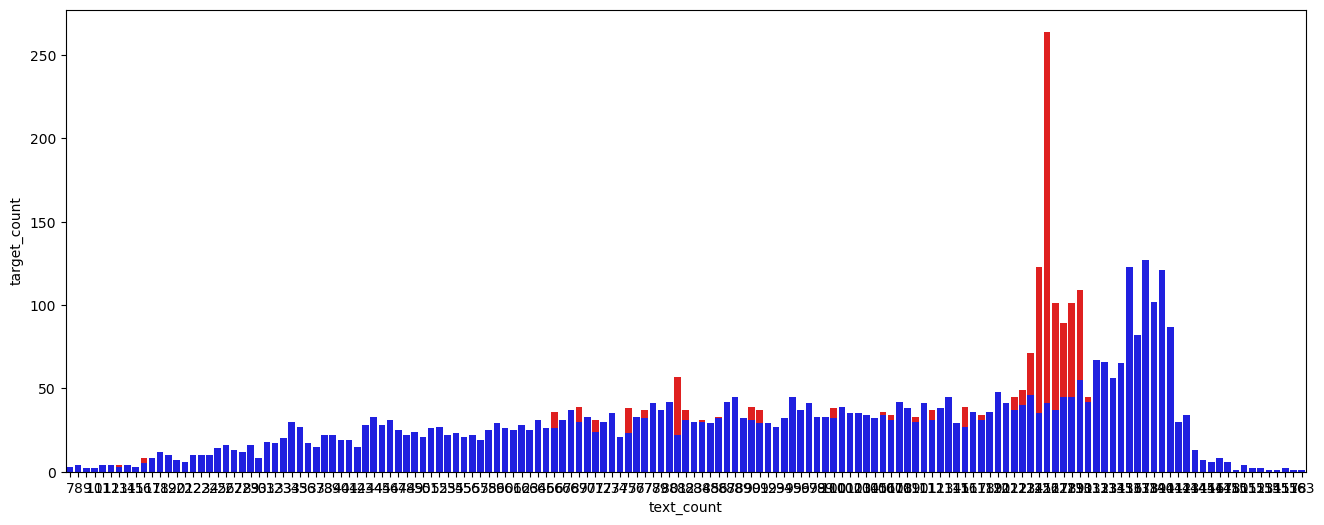

In [85]:
ax= plt.figure(figsize=(16, 6))
sns.barplot(x='text_count', y='target_count', data=verdaderos_df, color='red')
sns.barplot(x='text_count', y='target_count', data=falsos_df, color= 'blue')

In [101]:
verdaderos_lala = verdaderos_df[['text_count', 'target_count']]
verdaderos_lala.head()

,text_count,target_count
0,14,1
1,17,1
2,18,2
3,19,1
4,20,2


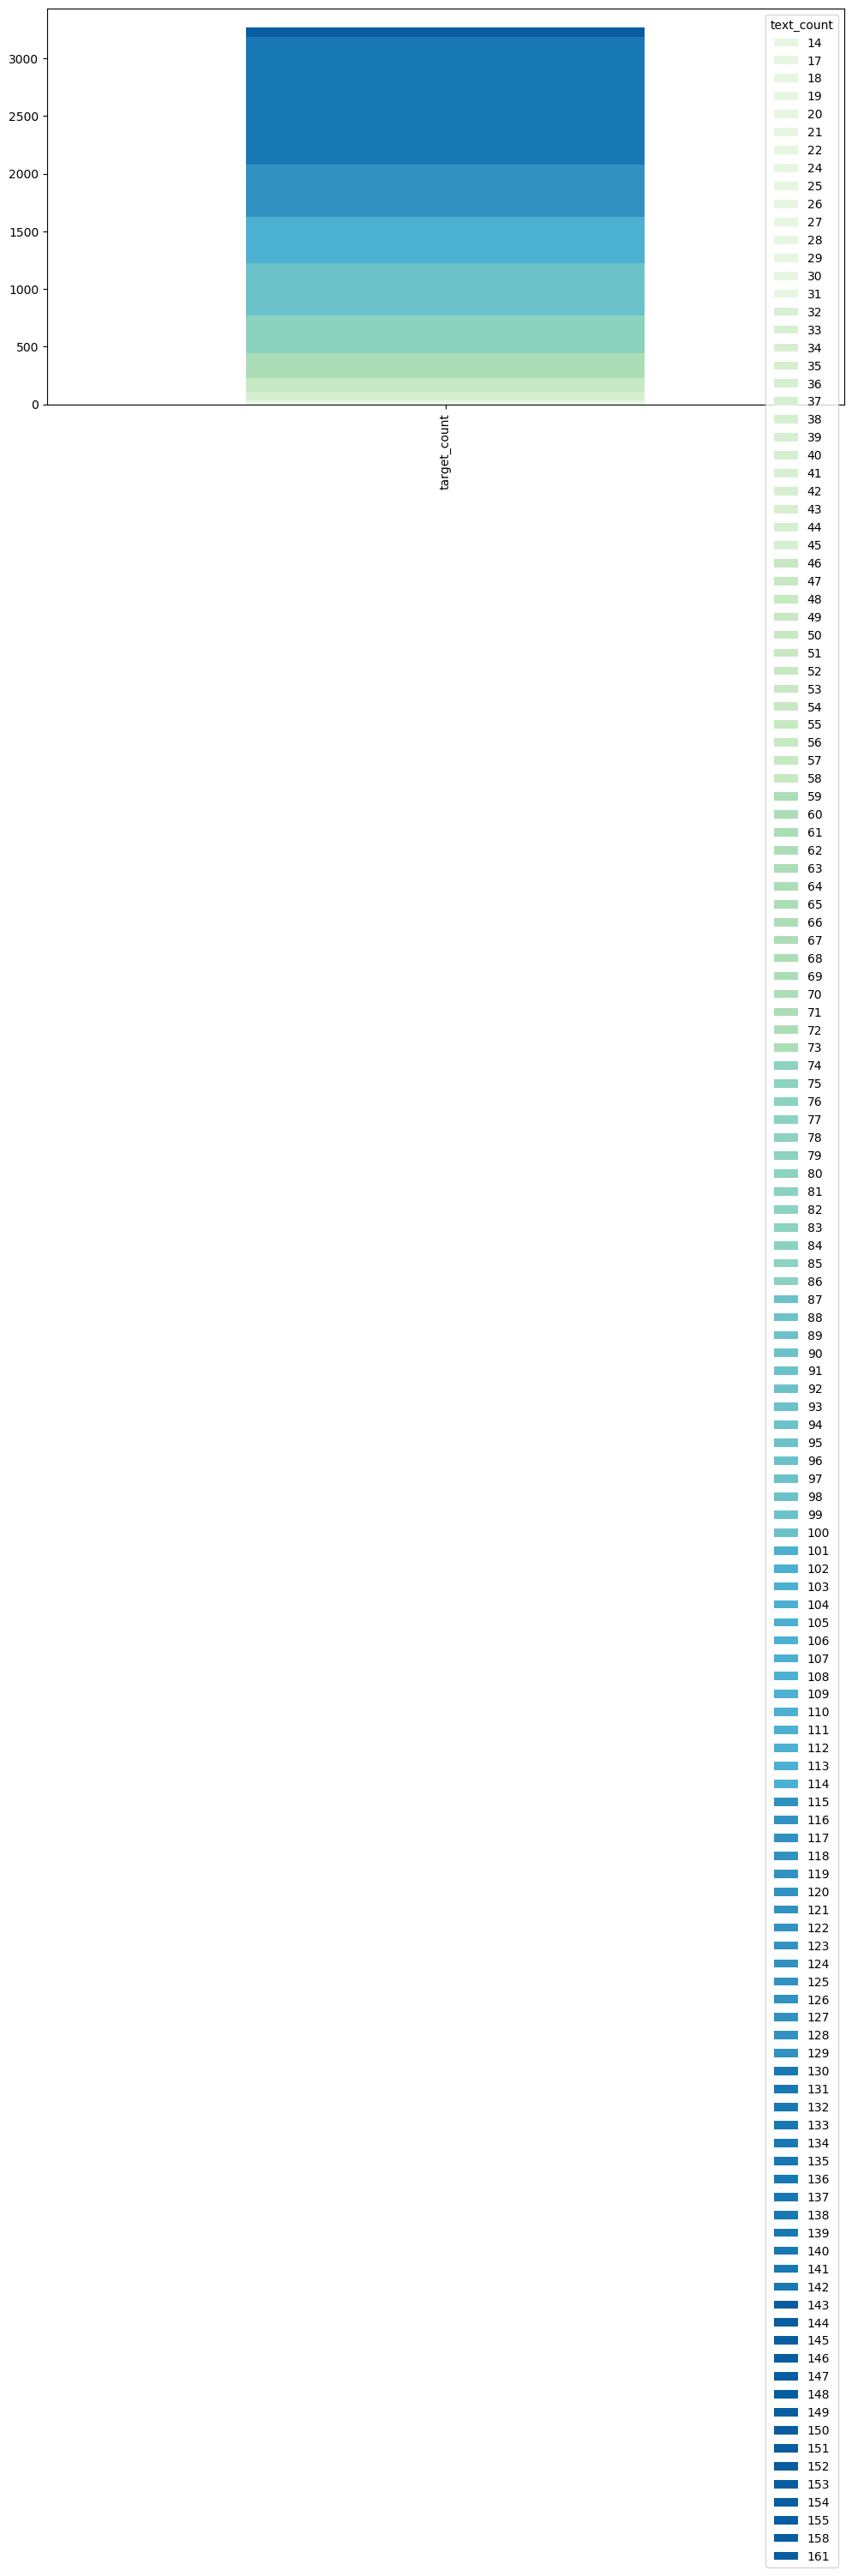

In [105]:

verdaderos_lala.set_index('text_count')\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(12,6))

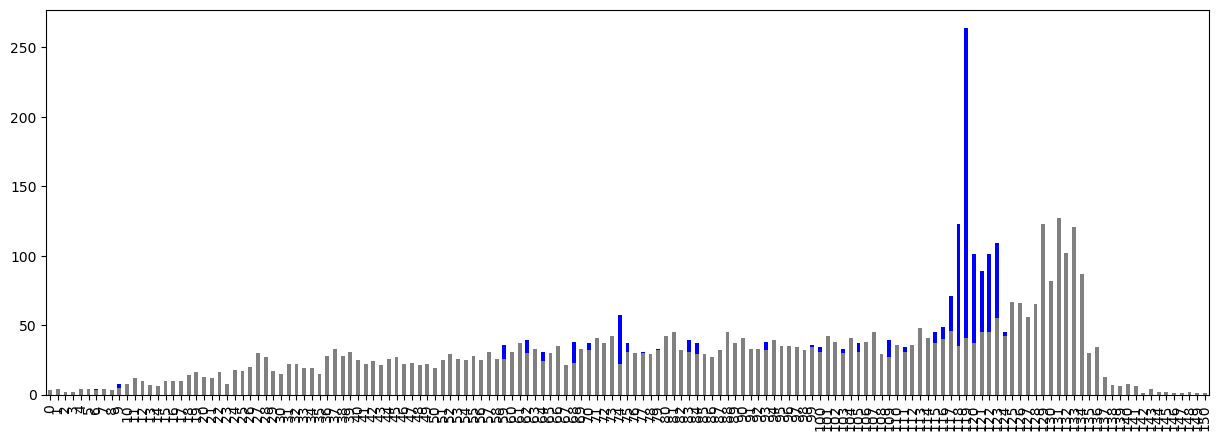

In [66]:
verdaderos_df['target_count'].sort_index().plot(kind='bar', figsize=(15,5), color='blue')
falsos_df['target_count'].sort_index().plot(kind='bar', figsize=(15,5), color='grey')
#.plot(kind='hist', bins=80)
#falsos_df['target_count'].sort_index().plot(kind='bar',bins=80, figsize=(15,5))
#spotify_songs['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5)) # ver layout

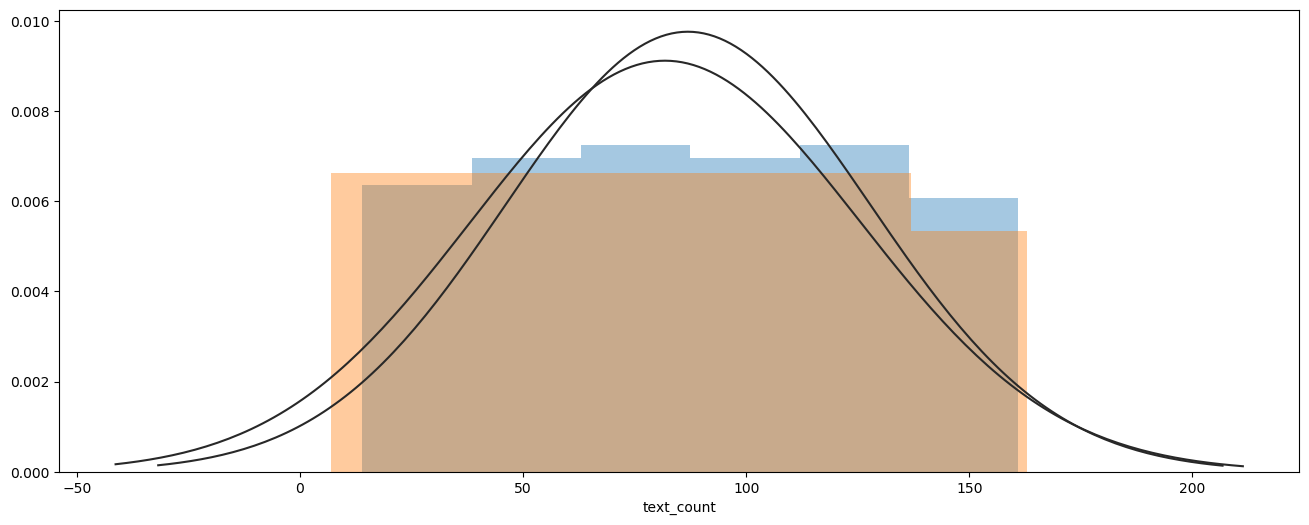

In [32]:
ax= plt.figure(figsize=(16, 6))
sns.distplot(verdaderos_df['text_count'], kde=False, fit=stats.gamma)
sns.distplot(falsos_df['text_count'], kde=False, fit=stats.gamma)


#sns.distplot(x, kde=False, fit=stats.gamma);

In [33]:
#spotify_songs['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5)) # ver layout

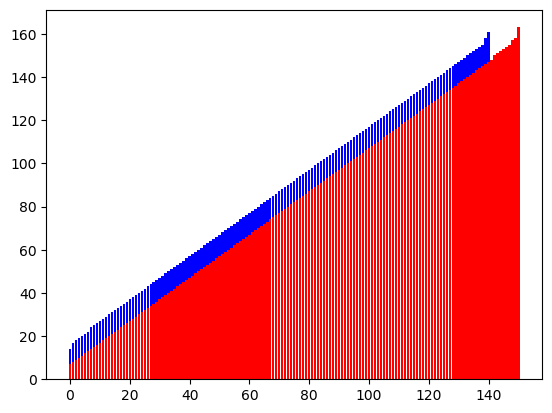

In [34]:

A = verdaderos_df['text_count']
B = falsos_df['text_count']

X = range(verdaderos_df['text_count'].count())
E = range(falsos_df['text_count'].count())
plt.bar(X, A, color = 'b')
plt.bar(E, B, color = 'r')
plt.show()

In [35]:
verdaderos_df['text_count'].count()

141

In [65]:
main_genres_counts = verdaderos_df["text_count"].value_counts()

main_genres_counts
#main_genres_counts = spotify_songs["Top Genre"].value_counts()
#main_genres_counts

161    1
60     1
66     1
65     1
64     1
      ..
116    1
117    1
118    1
119    1
14     1
Name: text_count, Length: 141, dtype: int64

In [72]:
asd = verdaderos_df['target_count'].sort_index().head()
asd1 = falsos_df['target_count'].sort_index().head()
#falsos_df['target_count'].sort_index()

Text(0, 0.5, 'Genero')

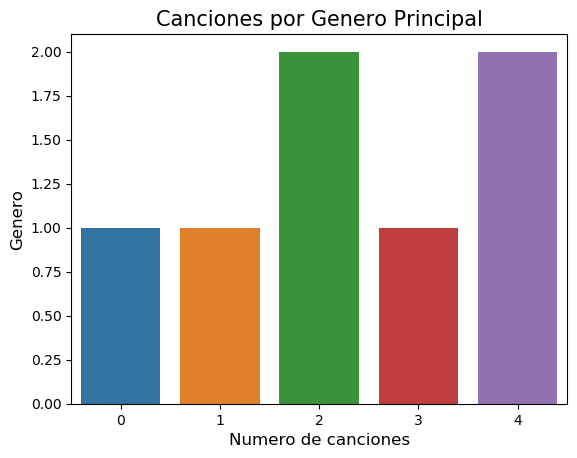

In [74]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x=asd.index, y=asd.values)
g = sns.barplot(x=asd1.index, y=asd.values)
g.set_title("Canciones por Genero Principal", fontsize=15)
g.set_xlabel("Numero de canciones", fontsize=12)
g.set_ylabel("Genero", fontsize=12)

In [52]:
main_genres_counts

161    1
60     1
66     1
65     1
64     1
      ..
116    1
117    1
118    1
119    1
14     1
Name: text_count, Length: 141, dtype: int64

In [75]:
verdaderos_df

,text_count,target_mean,target_max,target_min,target_count
0,14,1,1,1,1
1,17,1,1,1,1
2,18,1,1,1,2
3,19,1,1,1,1
4,20,1,1,1,2
...,...,...,...,...,...
136,153,1,1,1,2
137,154,1,1,1,1
138,155,1,1,1,1
139,158,1,1,1,1


In [113]:
verdaderos_df

,text_count,target_mean,target_max,target_min,target_count
0,14,1,1,1,1
1,17,1,1,1,1
2,18,1,1,1,2
3,19,1,1,1,1
4,20,1,1,1,2
...,...,...,...,...,...
136,153,1,1,1,2
137,154,1,1,1,1
138,155,1,1,1,1
139,158,1,1,1,1


ValueError: shape mismatch: objects cannot be broadcast to a single shape

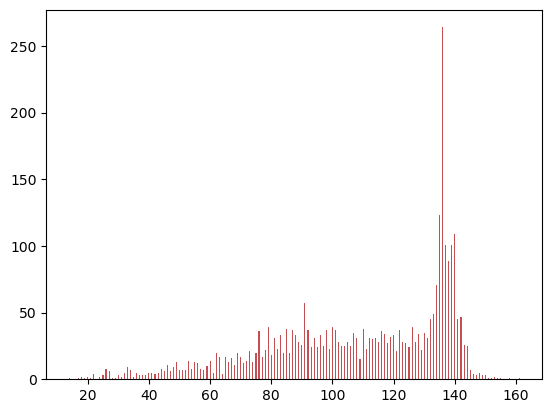

In [137]:
N = 5
menMeans   = verdaderos_df['target_count']
womenMeans = falsos_df['target_count']
ind = verdaderos_df['text_count']    # the x locations for the groups
ind2 = falsos_df['text_count'] 
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,   width, color='r')
p2 = plt.bar(ind2, womenMeans, width, color='y', bottom=menMeans)


plt.show()

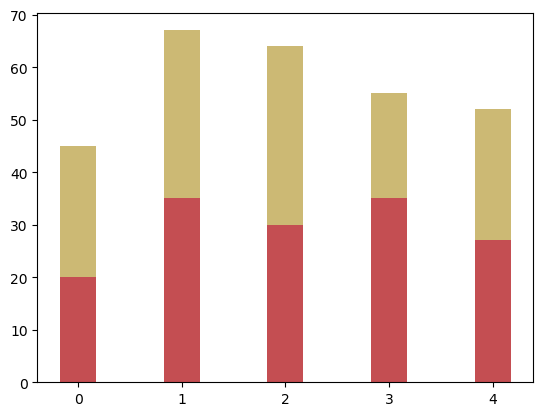

In [127]:
N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,   width, color='r')
p2 = plt.bar(ind, womenMeans, width, color='y', bottom=menMeans)

plt.show()

In [141]:
verdaderos_corto_df = verdaderos_df[['text_count', 'target_count']]
verdaderos_corto_df

,text_count,target_count
0,14,1
1,17,1
2,18,2
3,19,1
4,20,2
...,...,...
136,153,2
137,154,1
138,155,1
139,158,1


In [142]:
falsos_corto_df = falsos_df[['text_count', 'target_count']]
falsos_corto_df

,text_count,target_count
0,7,3
1,8,4
2,9,2
3,10,2
4,11,4
...,...,...
146,154,1
147,155,1
148,157,2
149,158,1


In [180]:
joined = falsos_corto_df.merge(verdaderos_corto_df, left_on='text_count', right_on='text_count', how='outer')    
#oscars_short_perYear=oscars_short.merge(grouped, left_on='year_of_award',
#right_on='year_of_award',how='outer')

In [181]:
joined

,text_count,target_count_x,target_count_y
0,7,3.0,NaN
1,8,4.0,NaN
2,9,2.0,NaN
3,10,2.0,NaN
4,11,4.0,NaN
...,...,...,...
148,157,2.0,NaN
149,158,1.0,1.0
150,163,1.0,NaN
151,149,NaN,3.0


In [182]:
joined_fillna = joined.fillna(0)

In [199]:
joined_fillna.head(10)

,text_count,target_count_x,target_count_y
0,7,3.0,0.0
1,8,4.0,0.0
2,9,2.0,0.0
3,10,2.0,0.0
4,11,4.0,0.0
5,12,4.0,0.0
6,13,3.0,0.0
7,14,4.0,1.0
8,15,3.0,0.0
9,16,5.0,0.0


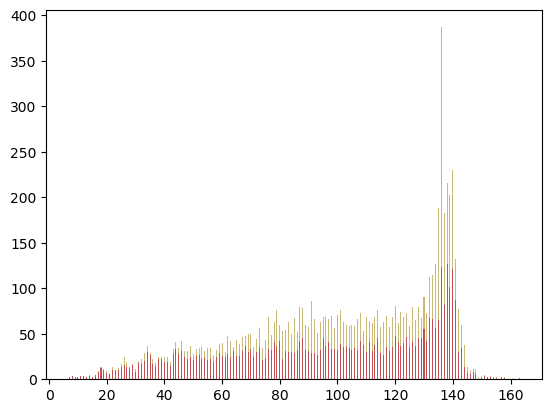

In [201]:

menMeans   = joined_fillna['target_count_x']
womenMeans = joined_fillna['target_count_y']
ind = joined_fillna['text_count']    # the x locations for the groups
ind2 = joined_fillna['text_count'] 
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,   width, color='r')
p2 = plt.bar(ind2, womenMeans, width, color='y', bottom=menMeans)


plt.show()

In [170]:
joined.head(20)

,text_count,target_count_x,target_count_y
0,7,3.0,NaN
1,8,4.0,NaN
2,9,2.0,NaN
3,10,2.0,NaN
4,11,4.0,NaN
...,...,...,...
128,135,65.0,123.0
129,136,123.0,264.0
130,137,82.0,101.0
131,138,127.0,89.0


### Agrupando por text_count

In [35]:
grouped_text_count=train_df.groupby(['text_count']).agg({'target':['mean', 'max', 'min','count']}) 
grouped_text_count

target              
             mean max min count
text_count                     
7             0.0   0   0     3
8             0.0   0   0     4
9             0.0   0   0     2
10            0.0   0   0     2
11            0.0   0   0     4
...           ...  ..  ..   ...
155           0.5   1   0     2
157           0.0   0   0     2
158           0.5   1   0     2
161           1.0   1   1     1
163           0.0   0   0     1

[153 rows x 4 columns]

In [36]:
level0=grouped_text_count.columns.get_level_values(0)

level1=grouped_text_count.columns.get_level_values(1)

grouped_text_count.columns = level0 + '_' + level1



#grouped=oscars_short.groupby(['award','religion']).size()
#grouped=grouped.reset_index(inplace=True)
grouped_text_count

,target_mean,target_max,target_min,target_count
text_count,,,,
7,0.0,0,0,3
8,0.0,0,0,4
9,0.0,0,0,2
10,0.0,0,0,2
11,0.0,0,0,4
...,...,...,...,...
155,0.5,1,0,2
157,0.0,0,0,2
158,0.5,1,0,2


In [37]:
grouped_text_count=grouped_text_count.reset_index()

In [38]:
grouped_text_count

,text_count,target_mean,target_max,target_min,target_count
0,7,0.0,0,0,3
1,8,0.0,0,0,4
2,9,0.0,0,0,2
3,10,0.0,0,0,2
4,11,0.0,0,0,4
...,...,...,...,...,...
148,155,0.5,1,0,2
149,157,0.0,0,0,2
150,158,0.5,1,0,2
151,161,1.0,1,1,1


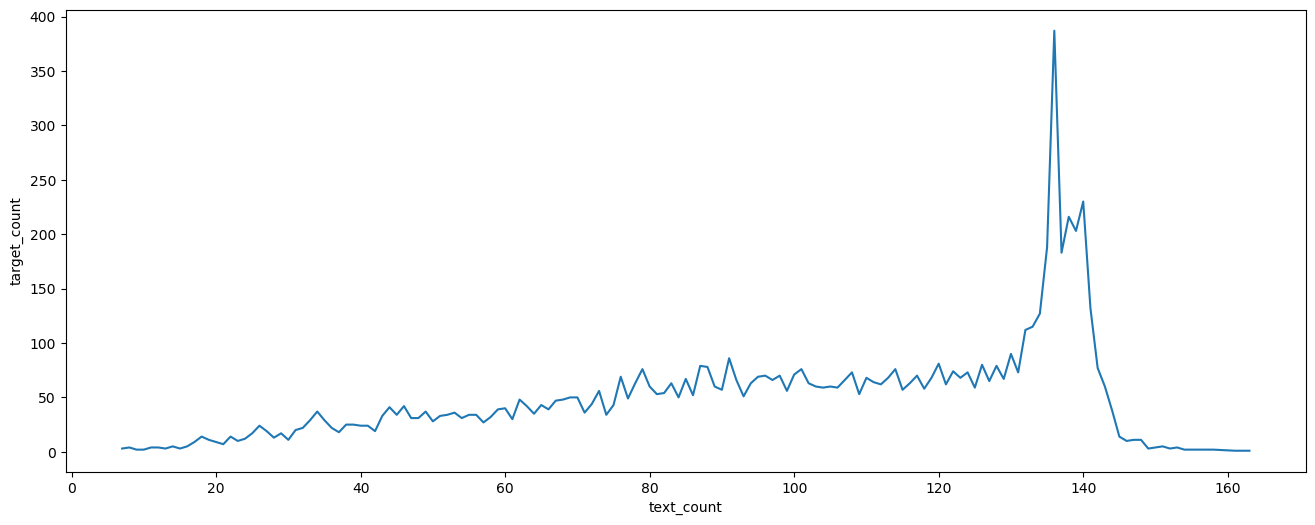

In [39]:
ax= plt.figure(figsize=(16, 6))
sns.lineplot(x='text_count', y='target_count', data=grouped_text_count)

In [40]:
target_df=train_df.groupby(['target']).agg({'text_count':['mean', 'max', 'min','count']}) 
target_df

text_count               
              mean  max min count
target                           
0        95.981345  163   7  4342
1       108.444207  161  14  3271

In [41]:
level0=target_df.columns.get_level_values(0)

level1=target_df.columns.get_level_values(1)

target_df.columns = level0 + '_' + level1



#grouped=oscars_short.groupby(['award','religion']).size()
#grouped=grouped.reset_index(inplace=True)
target_df
#col_rename={0:'count_religion'}
#oscars_short_by_religion=oscars_short_by_religion.rename(columns=col_rename)
#oscars_short_by_religion

,text_count_mean,text_count_max,text_count_min,text_count_count
target,,,,
0,95.981345,163,7,4342
1,108.444207,161,14,3271


In [42]:
target_df=target_df.reset_index()

In [43]:
target_df

,target,text_count_mean,text_count_max,text_count_min,text_count_count
0,0,95.981345,163,7,4342
1,1,108.444207,161,14,3271


# De aca para abajo no darle bola. es teoria

### To begin, we will be importing the libraries we will be using for this example:

* **pandas**: To provide high-performance, easy-to-use data structures and data analysis tools for the Python programming

* **numpy**: To add support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* **matplotlib**: Plotting library for the Python programming language and its numerical mathematics extension NumPy.

#### We will be also using _%matplotlib inline_, to have the output of plotting commands displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials



In [46]:
# Authenticate and create the PyDrive client
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#### Now we are ready to read the first file. As data is in csv format, we will be using the read_csv() function, which allows us to parse and load data into a dataframe (in memory) easily.

#### To see what we just read, we will be using the head() function. We can indicate the number of rows as a parameter, or by default it will show 5 rows.
####  

In [47]:

#id='1IYecdd6KegNcDM-Az6DtDPBCFeNpiw5D'
#downloaded = drive.CreateFile({'id': id})
#downloaded.GetContentFile('Oscars-demographics-DFE.csv')

In [48]:
# Load the Data and take a quick look.
oscars_demographics = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1')
oscars_demographics.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'Oscars-demographics-DFE.csv'

In [49]:
oscars_short = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1',\
                usecols=['birthplace', 'date_of_birth', 'race_ethnicity', 'religion','sexual_orientation', 'year_of_award', 'award', 'movie', 'person'])
oscars_short.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'Oscars-demographics-DFE.csv'

In [50]:
# Information about the dataset
oscars_demographics.info()

NameError: name 'oscars_demographics' is not defined

In [ ]:
# Some stats about the numeric columns in our dataset
oscars_demographics.describe()

### DataFrame structure

#### This is how a DataFrame is shown. We can see that both the column names and the index names are in bold. Columns and index provide labels to the columns and rows, which allow for direct and easy access to different subsets of data.

#### DataFrame data (values) is always in regular font and is an entirely separate component from the columns or index.

####  Each of the three DataFrame components: the index, columns, and data; may be accessed directly from a DataFrame. Each of these components is itself a Python object with its own unique attributes and methods.

#### Let´s see how to access each of them:
####     

In [ ]:
oscars_index = oscars_demographics.index
oscars_columns = oscars_demographics.columns
oscars_data = oscars_demographics.values

In [ ]:
oscars_index

In [ ]:
oscars_columns

In [ ]:
oscars_data

In [ ]:
type(oscars_index)

In [ ]:
type(oscars_columns)

In [ ]:
type(oscars_data)

### Data Types

* _bool_: Boolean, stored in a single byte
* _int_: Integer, defaulted to 64bits, also available unsigned int
* _float_: Float, defaulted to 64bits
* _complex_: Complex, rarely seen in data analysis
* _object_: Object, typically a string, but is a catch-all for columns with multiple different types or other python objects
* _datetime64_: Datetime, specific moment in time
* _timedelta64_: Timedelta, amount of time
* _category_: Categorical, used for columns with a few possible values

#### We can use _dtype_ to display the data type associated with each column
##   

In [ ]:
oscars_demographics.dtypes

In [ ]:
#Using dtypes we saw the data types of each column. To see the quantity of columns with each data type we can use value_counts:
oscars_demographics.dtypes.value_counts()

### Series

  It is a __single dimension__ of data, composed of just an index and the data

  We can select a column using the __index operator__, or using the __dot notation__. 

###   

In [ ]:
# We can indicate a column name, using the index operator:

oscars_demographics['person']

In [ ]:
# We can also use the dot notation to indicate which column to select

oscars_demographics.person

### In this case, both outputs are the same, they are series. It has an index and data, the data type is the one from the column, in this case is object. 

Notice that this worked because the column name doesn´t include a blank. If the column was named business name instead of name, it whouldn´t have worked. 

Best practice is to use always the __index operator__, and avoid the use of the dot notation.
###    

In [ ]:
#To verify the data type of the output:

type(oscars_demographics['person'])

In [ ]:
type(oscars_demographics['person'].to_frame())

In [ ]:
oscars_demographics['person'].to_frame().info()

### Series Methods

#### We will start understanding what methods can be applied to a series, and some examples. Methods will depend on the data type.
### 

In [ ]:
s_attr_methods = set(dir(pd.Series))
len(s_attr_methods)

In [ ]:
s_attr_methods

In [ ]:
df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

In [ ]:
df_attr_methods

#### As an example, we will select columns with two different data types

In [ ]:
#Selecting two columns with different data types:
oscars_movie = oscars_demographics['movie']
oscars_year = oscars_demographics['year_of_award']

In [ ]:
oscars_movie.head()

In [ ]:
oscars_year.head()

### Value_Counts()

This method is usefull to understand the distribution the data on the serie contains. It´s usually more useful in object series than in numeric series 

In [ ]:
oscars_movie.value_counts()

We can also see the values normalized, which give us another perspective on the volume of occurency of each of the elemnts:


In [ ]:
oscars_movie.value_counts(normalize=True)

#### Although it is more useful in object series, it helps to understand values distribution in some numeric series:
####     

In [ ]:
oscars_year.value_counts()

In [ ]:
oscars_demographics['year_of_award'].value_counts()

#### Value_counts() return a series, where the value is the index, and the count associated to the value is the element.

#### Counting the number of elements in a serie: size, shape, len()

In [ ]:
oscars_demographics.size

In [ ]:
oscars_demographics.shape

In [ ]:
len(oscars_demographics)

In [ ]:
oscars_demographics.count()

_size_, _len_ and _count_ return __scala__ values, but _shape_ returns a __one-item tuple__.

#### Difference between size, shape, len() and Count()

In [ ]:
# Although size (shape and len) will still give us the number of elements:
oscars_demographics['date_of_birth_gold'].size

In [ ]:
# Count will give us the number of elements with values:
oscars_demographics['date_of_birth_gold'].count()

In [ ]:
# Because of this result, we know there are null values. To confirm this we can run isnull() which will return a serie of the same length as the original one, indicating True (if null) or false (if not)
oscars_demographics['date_of_birth_gold'].isnull()

In [ ]:
# We can also check if there are null values by using hasnans attribute:
oscars_demographics['date_of_birth_gold'].hasnans

In [ ]:
# We need to take a decision on what to do with te null values. Sometimes we can ignore them, sometimes we can eliminate them, and others we can fill them using a specific value, or the previous or following value in the serie.

oscars_demographics.count()

In [ ]:
oscars_date_of_birth_gold = oscars_demographics['date_of_birth_gold']
oscars_date_of_birth_gold

In [ ]:
# Filling Nan with a specific value:

oscars_date_of_birth_gold_fillna = oscars_date_of_birth_gold.fillna('None')

In [ ]:
oscars_date_of_birth_gold_fillna.count()

In [ ]:
oscars_date_of_birth_gold_fillna.size

In [ ]:
# removing NaN elements:

oscars_date_of_birth_gold_dropped = oscars_date_of_birth_gold.dropna()

In [ ]:
oscars_date_of_birth_gold_dropped.count()

In [ ]:
oscars_date_of_birth_gold_dropped.size

#### Basic Statistics: min, max, mean, median, std, sum and describe methods


In [ ]:
#oscars_demographics.columns

col_rename ={'_trusted_judgments':'trusted_judgments'}

oscars_demographics = oscars_demographics.rename(columns=col_rename)



oscars_demographics.trusted_judgments.min(),oscars_demographics.trusted_judgments.max(),oscars_demographics.trusted_judgments.mean(),oscars_demographics.trusted_judgments.median(),oscars_demographics.trusted_judgments.std(),oscars_demographics.trusted_judgments.sum()

In [ ]:
oscars_demographics.trusted_judgments.describe()

In [ ]:
oscars_demographics.movie.describe()

In [ ]:
oscars_demographics.describe()

### Operators on a Series

In [ ]:
oscars_demographics['trusted_judgments']

In [ ]:
oscars_demographics['trusted_judgments'].mean()

In [ ]:
oscars_demographics['trusted_judgments'].min()

In [ ]:
oscars_demographics['trusted_judgments'].max()

In [ ]:
oscars_demographics['trusted_judgments'].value_counts()

In [ ]:
oscars_demographics['trusted_judgments'].min()+1

In [ ]:
mas_uno=oscars_demographics['trusted_judgments']+1

In [ ]:
mas_uno.head()

In [ ]:
mas_uno.min()

In [ ]:
mas_uno.max()

In [ ]:
oscars_demographics['trusted_judgments'] * 3

If we multiply a series it will return another series, with that operation applied to each of the elemnts. We can also use other operators as sum (+), minus (-), division (//), and exponentiation (**). Note that consecutive division operators (//) is used for floor division and the percent sign (%) for the modulus operator, which returns the remainder after a division.

We can also use comparison opperators, like __greater than__ (>), __less than__ (<), __greater than or equal to__ (>=), __less than or equal to__ (<=), __equal to__ (==), and __not equal to__ (!=). These also return a seris, where each elemen is True or False based on the result of the comparison. 

In [ ]:
(oscars_year==1969).value_counts()

#### For every operator, there is also a method that does the same thing:

#### Arithmetic

* instead of +, -, *, /, //, %, **   We can use: add, sub, mul, div, floordiv, mod, pow 

#### Comparison 

* Instead of <, >, <=, >=, ==, !=  We can use:  lt, gt, le, ge, eq, ne


In [ ]:
oscars_year.eq(1969).value_counts()

### Chaining Series Methods Together

#### As methods usually return other series or dataframes, it is possible to concatenate two or more methods.

* We use dot (.) to concatenate methods
* We use back-slash (\\) to continue the sentence in the following line
* To facilitate reading, we try to use only one method per line
* We can also use parentheses to indicate the whole sentense


Let´s say we want to count the NaN values on Year of Award gold, we can do it using isnll() and sum() methods:


In [ ]:
oscars_demographics['year_of_award_gold'].isnull().sum()

Or the average of NaN with mean()

In [ ]:
oscars_demographics['year_of_award_gold'].isnull().mean()

To split the line in two different lines, we can use \


In [ ]:
oscars_demographics['year_of_award_gold'].isnull()\
    .mean()

Or writing the sentence between ()

In [ ]:
(oscars_demographics['year_of_award_gold'].isnull()
     .mean())

## Cleaning the Dataset
In this section we are going to clean the Data and get ir ready for all the analysis.
The steps we are going to take are:

* Keep the columns we are interested in using
* Clean Null values from the dataset, we just remove the whole movie if it has a null value in a column.
* Convert year to INT (from float)

In [ ]:
# Keep only interesting columns
oscars = oscars_demographics[['birthplace',
       'date_of_birth', 'race_ethnicity', 'religion',
       'sexual_orientation', 'year_of_award', 'award', 'movie', 'person']]

In [ ]:
# Clean NAs
print(len(oscars))
oscars.dropna(inplace=True)
print(len(oscars))

In [ ]:
oscars.tail()

In [ ]:
oscars.info()

### Indexes

* Indexes provide a label for each row
* If no index is explicitly provided, a RangeIndex is created with labels starting in 0 
####   

If we go back to our example, business did have a __RangeIndex__:

In [ ]:
oscars

We can change the index and use business Id instead, using the set_index method:


In [ ]:
oscars.count()

In [ ]:
oscars_byID=oscars.set_index(['person','year_of_award'])

In [ ]:
oscars_byID

In [ ]:
oscars_byID.count()

In [ ]:
oscars_byID = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1', index_col=['person','year_of_award'])
oscars_byID.tail()

We can eliminate the index using the reset_index method:

In [ ]:
oscars_byID.reset_index()

#### In both cases we can see that business_id is set as the DataFrame index, and there is no business_id column. If we want to still have a business_id column we can use set_index with the parameter drop = False

In [ ]:
oscars_byID=oscars.set_index(['person','year_of_award'],drop=False)

In [ ]:
oscars_byID

### Renaming Row and Column Names

* To make them more descriptive
* To follow a standard
* To avoid blanks, and other special characters

In [ ]:
oscars_byID = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1', index_col=['person','year_of_award'])
oscars_byID.tail()

In [ ]:
idx_rename={'James Coburn':'Jimmy Coburn'}
col_rename={'unit_id':'Unit_ID','golden':'Golden'}
oscars_byID_renamed=oscars_byID.rename(index=idx_rename, columns=col_rename)
oscars_byID_renamed

In [ ]:
oscars_byID.loc[('James Coburn',1999),:]

In [ ]:
# We can obtain index and column from business dataframe:
oscars_columns=oscars_byID.columns
oscars_columns

In [ ]:
columns_list=oscars_columns.tolist()
columns_list

In [ ]:
# Rename one or more elements of the lists
columns_list[0]='unitID'
# And finally we assign it back to the Data Frame
oscars_byID.columns=columns_list
oscars_byID

In [ ]:
oscars

In [ ]:
oscars.loc[0]

In [ ]:
oscars_person=oscars[['person','date_of_birth','birthplace']].drop_duplicates(subset='person')
oscars_person.set_index('person',inplace=True)

In [ ]:
oscars_person

In [ ]:
oscars_awards=oscars[['person','year_of_award','award','movie']].drop_duplicates(subset='person')
oscars_awards.set_index('person',inplace=True)
oscars_awards

In [ ]:
oscars_awards.loc['Anne Hathaway',:]

In [ ]:
oscars.info()

In [ ]:
oscars.loc[:,'date_of_birth'] = pd.to_datetime(oscars['date_of_birth'], errors='coerce')

In [ ]:
oscars_demographics

### Creating and Deleting Columns in a DataFrame


In [ ]:
# We can easily create a new column by assigning values to it:
oscars_short['last_ten_years']=0
oscars_short

In [ ]:
oscars_short['last_ten_years']=oscars_short['year_of_award']>2009
oscars_short

In [ ]:
oscars_short['last_ten_years'].value_counts()

In [ ]:
#If we want to delete the column we just created:
oscars_short.drop(columns='last_ten_years',inplace=True)
oscars_short

If we want to add a column, but in a specific possition, we need to indicate that possition.
Let´s add the column before the review_count. To do that we calculate the possition of the review_count and calulate it +1

In [ ]:
date_of_birth_position=oscars_short.columns.get_loc('date_of_birth')+1
date_of_birth_position

In [ ]:
oscars_short.insert(loc=date_of_birth_position, column='last_ten_years', value=(oscars_short['year_of_award']>2009))
oscars_short

In [ ]:
del oscars_short['last_ten_years']
oscars_short

#  
### Data Frame Operations

#### We will now review other methods that apply to Data Frames, how to select multiple rows, how to chain multiple methods, etc

In [ ]:
# Similar to what we did when selecting one column, but instead of providing a column name, we will be passing a list of columns:
oscars_basics = oscars_short[['person','movie','award','year_of_award']]
oscars_basics

#### Selecting columns with methods

In [ ]:
oscars_short.dtypes.value_counts()

In [ ]:
oscars_short.loc[:,'date_of_birth'] = pd.to_datetime(oscars_short['date_of_birth'], errors='coerce')

In [ ]:
oscars_short.dtypes.value_counts()

We can select colums with a specific data type using the select_dtypes method.
using the parameter include we can indicate the data type we are looking for:

In [ ]:

oscars_short.select_dtypes(include=['int64']).head()

We can also select all numeric columns using include='number':

In [ ]:

oscars_short.select_dtypes(include='number').head()

We can select specific columns by filtering contect on the column names.


In [ ]:
oscars_short.filter(like='birth').head()

Filter also allows regular expressions:

In [ ]:
oscars_short.filter(regex='\_').head()

Lastly, using items parameter we can indicate the list of columns to select:


In [ ]:
oscars_short.filter(items=['person']).head()

### Ordering Columns

In [ ]:
oscars_short.columns

Let´s imagine we want to have the name of the person at the beginning...

In [ ]:
new_col_order = ['person', 'birthplace', 'date_of_birth', 'race_ethnicity', 'religion','sexual_orientation', 'year_of_award', 'award', 'movie']

oscars_new_col_order = oscars_short[new_col_order]
oscars_new_col_order.head()

#  
## Selecting subsets of data

* Selecting Series data 
* Selecting DataFrame rows 
* Selecting DataFrame rows and columns simultaneously 
* Selecting data with both integers and labels 
* Speeding up scalar selection 
* Slicing rows lazily 
* Slicing lexicographically

 

In [ ]:
oscars_short.head(10)

In [ ]:
oscars_short.iloc[5]

In [ ]:
oscars_short.iloc[0:6]

In [ ]:
oscars_short.iloc[5:10]

In [ ]:
oscars_short.iloc[10:20:2]

In [ ]:
oscars_short.iloc[5]

In [ ]:
oscars_short.loc[5]

In [ ]:
oscars_short.loc[[5,10]]

### Selecting Data Frame Columns and Rows simultaneously

#### _loc_ and _iloc_ allows us to do it

In [ ]:
oscars_short.head(10)

In [ ]:
oscars_short.iloc[1,5]

In [ ]:
oscars_short.iloc[:3,:5]

In [ ]:
oscars_short.iloc[:,[2,5]]

In [ ]:
oscars_short.loc[:,['birthplace','date_of_birth']]

In [ ]:
oscars_short.head(10)

In [ ]:
oscars_short.iloc[1:10:2,1]

In [ ]:
oscars_short.loc[1:10:2,'date_of_birth']

### Boolean indexing
We will try to find out which of the business with more than 100 reviews. To do that, we will start by creating a serie with boolean elements for each of the business:

In [ ]:
oscars_last_20_years=oscars_short['year_of_award']>1999

In [ ]:
oscars_last_20_years

As we saw, we can _sum_ boolean values, adding 1 if it is True and 0 if False. So if we want to know how many of them are dated in the last 20years, all we need to know is to sum up the values:

In [ ]:
oscars_last_20_years.sum()

If we want to know the % we can use _mean_ and multiply by 100:

In [ ]:
oscars_last_20_years.mean() * 100

In [ ]:
oscars_last_20_years.describe()

In [ ]:
oscars_last_20_years.value_counts()

We just created a boolean series by comparing a column with a condition. We can also create a series based on two different columns.

In [ ]:
oscars_best_director=oscars_short.award.str.contains('Best Director')

In [ ]:
oscars_best_director.head()

In [ ]:
oscars_best_director.value_counts()

we can combine both:

In [ ]:
oscars_last_20_years & oscars_best_director

In [ ]:
(oscars_last_20_years & oscars_best_director).value_counts()

### Filtering with boolean indexing

We will use the boolean series created to filter the information of the records that match the conditions

In [ ]:
oscars_short[oscars_last_20_years]

In [ ]:
oscars_short[oscars_best_director]

In [ ]:
oscars_short[(oscars_last_20_years&oscars_best_director)]

In [ ]:
oscars_short.count()

In [ ]:
oscars_short.drop_duplicates(inplace=True)

#  
#  
#  
#  Data Visualization 

* Analizing viariables


### Histograms

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.hist(color='darksalmon', figsize=(8, 4))

plt.show()

In [ ]:
# the same, but horizontal
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.hist(orientation='horizontal',color='lightblue', figsize=(8, 4))

plt.show()

### Density Plots

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.kde(color='lightgreen', figsize=(8, 4))

plt.show()

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram & KDE',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.hist(color='lightsteelblue', figsize=(8, 4), density=True)
oscars_short['year_of_award'].plot.kde(color='darkblue', ax=ax, secondary_y=True)

ax.set_ylabel('Density')
plt.show()


In [ ]:
# Density Plot and Histogram using sns
sns.distplot(oscars_short['year_of_award'], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Year of Award')
plt.ylabel('Density')
plt.title('Other histogram & dencity plot')


### Bar Plot

In [ ]:
oscars_per_person=oscars_short['person'].value_counts()
oscars_per_person

In [ ]:
type(oscars_per_person)

In [ ]:
oscars_per_person_df=oscars_per_person.to_frame()
oscars_per_person_df

In [ ]:
oscars_per_person_df.head(20).plot(kind='bar',figsize=(16,8),rot=85,title='Top Award Winners',color=(0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel('Oscars');
ax.set_xlabel('Name')

### Scatter Plot

In [ ]:
oscars_short.info()

In [ ]:
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['date_of_birth'].dt.year)

In [ ]:
oscars_short

In [ ]:
(oscars_short['age_at_award']>0).value_counts()

In [ ]:
from datetime import datetime
hundred_years=datetime.strptime('0100-01-01','%Y-%m-%d')
print(hundred_years)

In [ ]:
oscars_short['year_of_birth']=oscars_short.loc[:,'date_of_birth'].dt.year
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['date_of_birth'].dt.year)
oscars_short.loc[oscars_short['age_at_award']<1,'year_of_birth'] = oscars_short.loc[oscars_short['age_at_award']<1,'year_of_birth'] - 100

In [ ]:
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['year_of_birth'])

In [ ]:
oscars_short.loc[(oscars_short['age_at_award']<1),:]

In [ ]:
oscars_short

In [ ]:
oscars_short.plot.scatter('year_of_award','age_at_award', title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));
ax=plt.gca()
ax.set_ylabel('Age')
ax.set_xlabel('Year');

In [ ]:
oscars_short.corr()

In [ ]:
cor = oscars_short.corr().abs()

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl



fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(8,8))
heatplot = ax.imshow(cor, cmap='BuPu')
ax.set_xticklabels(cor.columns)
ax.set_yticklabels(cor.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Relationship between numeric columns")
ax.set_xlabel('Columns')
ax.set_ylabel('Columns')

#  
#  
#  
#  
##  Grouping for Aggregation, filtration and transformation

The most common use of a _groupby_ is performing an aggregation (which takes several values and converts them in one single value). 

In order to do this, we will define an __aggregating column__ (from where we take the value to aggregate) and an __aggregating function__ (how do we aggregate). 

Some common aggregating functions are _mean, sum, max, min, count_, etc...

The easiest way to do it, groupby + apply:

In [ ]:
oscars_short 

In [ ]:
grouped=oscars_short.groupby(['award']).agg({'age_at_award':['mean','count']}) 
grouped

In [ ]:
grouped=oscars_short.groupby(['year_of_award']).agg({'age_at_award':['mean','count']}) 
grouped

In [ ]:
grouped.loc[grouped[('age_at_award','count')]>5,:].sort_values(('age_at_award','mean'),ascending=False).head(10)

In [ ]:
oscars_short.groupby('award').mean().loc[:,'age_at_award'].plot(kind='bar',title='Average age by Award category',linewidth=2,figsize=(10,6), color='lightpink');
ax=plt.gca()
ax.set_ylabel('Average Age');
ax.set_xlabel('Category')

In [ ]:
grouped=oscars_short.groupby(['movie'])
grouped.head()

In [ ]:
grouped.get_group('Cabaret')

#  
###  Grouping by multiple columns

In [ ]:
grouped=oscars_short.groupby(['person','award']).size()
grouped

In [ ]:
grouped=oscars_short.groupby(['person','award']).size().sort_values(ascending=False)
grouped


In [ ]:
grouped=oscars_short.groupby(['person','award']).size().nlargest(20)
grouped

In [ ]:
#other alternative, without group by
oscars_short['person'].value_counts().nlargest(10)

In [ ]:
#other alternative, without group by
oscars_short['person'].value_counts().nsmallest(5)

If we want to create a dataframe, with the total number of elements per group (size), we can reset the index like following...

In [ ]:
oscars_short_by_religion=oscars_short.groupby(['award','religion']).size()
oscars_short_by_religion=oscars_short_by_religion.reset_index()
oscars_short_by_religion
col_rename={0:'count_religion'}
oscars_short_by_religion=oscars_short_by_religion.rename(columns=col_rename)
oscars_short_by_religion

#### As we saw before, we can apply more than one operation at the same time

In [ ]:
grouped=oscars_short.groupby(['year_of_award']).agg({'age_at_award':['mean','count']}) 
grouped.head(5)

####  We can even apply different operations to different columns

In [ ]:
grouped=oscars_short.groupby(['year_of_award']).agg({'age_at_award':['mean','count'],'year_of_birth':'min','religion':['max','min']}) 
grouped.head(20)

Inevitably, when using groupby, you will likely create a __MultiIndex__ in the columns or rows or both. DataFrames with MultiIndexes are more difficult to navigate and occasionally have confusing column names as well.

Doing this, we obtain a structure with two level of indexes. This difficults the access to the data.

Because of that we will try to simplify the structure.

Let's start by understanding how the index is presented at each level:

In [ ]:
level0=grouped.columns.get_level_values(0)

In [ ]:
level0

In [ ]:
level1=grouped.columns.get_level_values(1)

In [ ]:
level1

We can see that we have two columns called min. We can only differenciate them by using both index levels (the sum of stars or the sum of reviews)

We will try to reduce this structure, by concatenating both levels in the same column name.

In [ ]:
grouped.columns = level0 + '_' + level1

Doing this, we now have 5 different columns with one index level:

In [ ]:
grouped

We can see that we still have 2 levels in the row index. We can reduce this using _reset_index()_

In [ ]:
grouped.reset_index(inplace=True)

In [ ]:
grouped

Pandas also allows us to define our own aggregate functions:

In [ ]:
def add_one(x):
    return x.mean()+1 
     
oscars_short.groupby('award').agg({'age_at_award': ['mean', add_one]})

In [ ]:
add_one.__name__='PlusOne'
grouped=oscars_short.groupby('award').agg({'age_at_award': ['mean', add_one]})
grouped

In [ ]:
grouped=oscars_short.groupby('award')
print(type(grouped))

In [ ]:
grouped.ngroups

In [ ]:
grouped.get_group('Best Actor')

In [ ]:
from IPython.display import display

for name, group in grouped:
        print(name)
        display(group.head(3))

In [ ]:
grouped['race_ethnicity'].max()

In [ ]:
for age_at_award, group in grouped:
        print(age_at_award)
        display(group.sort_values('age_at_award',ascending=False).head(3))


#  
###  Transform
#   

In [ ]:
oscars_short.head(3)

In [ ]:
grouped=oscars_short.groupby('award')
grouped['age_at_award'].mean()

In [ ]:
grouped['age_at_award'].transform('mean').head(20)

In [ ]:
oscars_short['avg_age_at_award'] = oscars_short.groupby('award')['age_at_award'].transform('mean')
oscars_short['is_above_avg_age'] = oscars_short['avg_age_at_award'] < oscars_short['age_at_award']

In [ ]:
oscars_short.head(20)

Transform can also be used to do transformations to a dataframe, in combination with apply

In [ ]:
#Let´s imagine we want to add 1 to the year of birth (just to see how to do it)
oscars_short['year_of_birth'].transform(func = lambda x : x + 1)

We can then assign this serie to the old year_of_birth column, or to a new one.

Transform comes in handy during feature extraction. It can replace groupby + merge operation, all in one.

#  
#   
#   
#   
# Combining Pandas Objects
#   
To do this, we will work with _append, concat, join_ and _merge_

The first one we will use is append, which allows us to add one or more rows to a dataframe. We can manually add one row at a time with .loc, but we will be able to add several rows (or even indicate them with a second df) using append

In [ ]:
oscars_short_BestActress=oscars_short.loc[oscars_short['award'].str.contains('Best Actress'),:]
oscars_short_BestActor=oscars_short.loc[oscars_short['award'].str.contains('Best Actor'),:]

In [ ]:
oscars_short_BestActress.head()

In [ ]:
oscars_short_BestActor.head()

In [ ]:
oscars_short_Best_ActorandActress=oscars_short_BestActor.append(oscars_short_BestActress)

In [ ]:
oscars_short_Best_ActorandActress

In [ ]:
len(oscars_short_BestActor)

In [ ]:
len(oscars_short_BestActress)

In [ ]:
86+87

### Concat

We will see how to do the same (and more) using concat

In [ ]:
oscars_short_BestActress.head()

In [ ]:
oscars_short_Best_ActorandActress_concat=pd.concat([oscars_short_BestActor,oscars_short_BestActress])

In [ ]:
oscars_short_Best_ActorandActress_concat

![](Data/Yelp/join-or-merge-in-python-pandas-1.png)

In [ ]:
grouped=oscars_short.groupby(['year_of_award']).agg({'age_at_award':['mean','count']})
level0=grouped.columns.get_level_values(0)
level1=grouped.columns.get_level_values(1)
grouped.columns = level0 + '_' + level1
grouped.reset_index(inplace=True) 

In [ ]:
grouped

As we want the records of both dataframes, we will use outer join

In [ ]:
oscars_short_perYear=oscars_short.merge(grouped, left_on='year_of_award', right_on='year_of_award',how='outer')

In [ ]:
oscars_short_perYear.head()

If we want to obtain only the awards for the years when the average age was less than 40 we can do...

In [ ]:
year_less_than_40=grouped.loc[grouped['age_at_award_mean']<40,:]

In [ ]:
year_less_than_40

Merge operation, by default is inner 

In [ ]:
oscars_short.merge(year_less_than_40, left_on='year_of_award', right_on='year_of_award')